# Data exploration

In [1]:
import os
import pandas as pd

In [2]:
BASE_DIR = os.getcwd()
DATA_DIR = os.path.join(BASE_DIR, "data")

In [3]:
df_main = pd.read_csv(os.path.join(DATA_DIR, "aw_fb_data.csv"))

In [4]:
df_main.head(3)

,Unnamed: 0,X1,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
0,1,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.0,19.531302,0.138520,1.0,0.089692,apple watch,Lying
1,2,2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.0,19.453390,0.137967,1.0,0.102088,apple watch,Lying
2,3,3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.0,19.540825,0.138587,1.0,0.115287,apple watch,Lying


In [5]:
def replace_level_activity(activity):
    levels = {
        "Sitting": 0,
        "Lying": 1,
        "Self Pace walk": 3,
        "Running 3 METs": 4,
        "Running 5 METs": 5,
        "Running 7 METs": 6
    }
    
    return levels[activity]

In [6]:
df_main = df_main[["hear_rate", "resting_heart", "corr_heart_steps", "activity"]]

df_main.rename(columns={
    "hear_rate": "hearth_rate",
    "resting_heart": "hearth_rate_resting",
    "corr_heart_steps": "hearth_corr_steps",
    "activity": "level"
    }, inplace=True)

df_main["level"] = df_main["level"].apply(lambda x: replace_level_activity(x))

df_main[["hearth_rate", "hearth_rate_resting"]] = df_main[["hearth_rate", "hearth_rate_resting"]].astype(int)

In [7]:
df_main.head(3)

,hearth_rate,hearth_rate_resting,hearth_corr_steps,level
0,78,59,1.0,1
1,78,59,1.0,1
2,78,59,1.0,1


<AxesSubplot: >

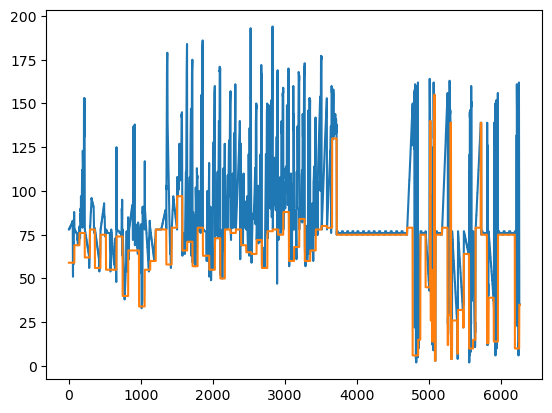

In [8]:
df_main["hearth_rate"].plot()
df_main["hearth_rate_resting"].plot()

<AxesSubplot: >

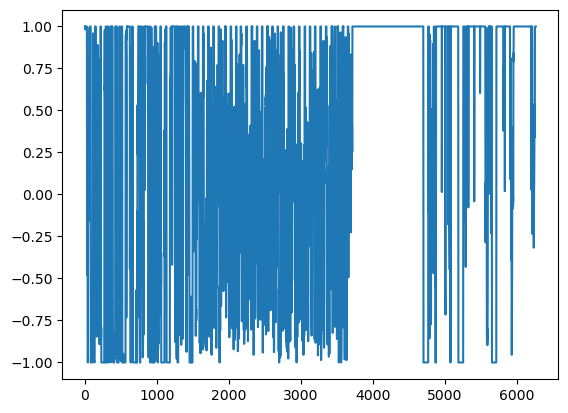

In [9]:
df_main["hearth_corr_steps"].plot()

<AxesSubplot: >

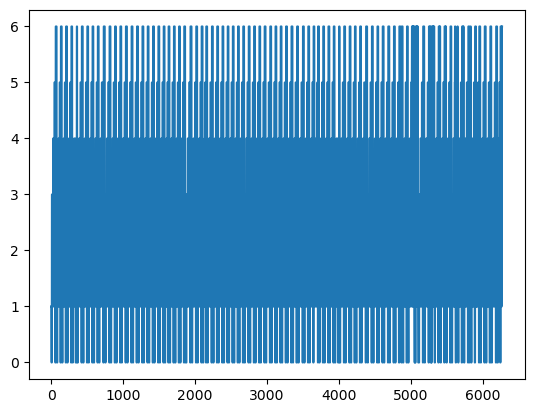

In [10]:
df_main["level"].plot()

---

In [11]:
df_aw = pd.read_csv(os.path.join(DATA_DIR, "data_for_weka_aw.csv"))

In [12]:
df_aw.head(3)

,Unnamed: 0,age,gender,height,weight,Applewatch.Steps_LE,Applewatch.Heart_LE,Applewatch.Calories_LE,Applewatch.Distance_LE,EntropyApplewatchHeartPerDay_LE,EntropyApplewatchStepsPerDay_LE,RestingApplewatchHeartrate_LE,CorrelationApplewatchHeartrateSteps_LE,NormalizedApplewatchHeartrate_LE,ApplewatchIntensity_LE,SDNormalizedApplewatchHR_LE,ApplewatchStepsXDistance_LE,activity_trimmed
0,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.0,19.531302,0.138520,1.0,0.089692,Lying
1,2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.0,19.453390,0.137967,1.0,0.102088,Lying
2,3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.0,19.540825,0.138587,1.0,0.115287,Lying


<AxesSubplot: >

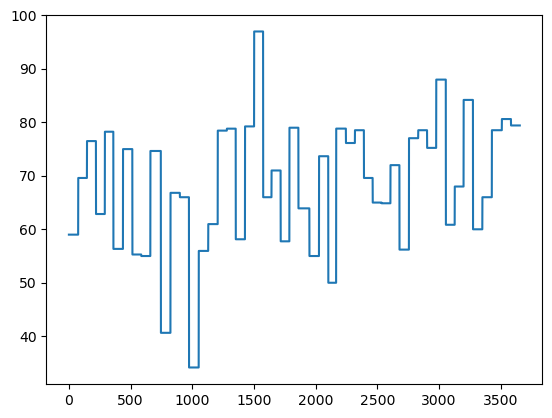

In [13]:
df_aw["RestingApplewatchHeartrate_LE"].plot()

In [14]:
df_aw = df_aw[["Applewatch.Heart_LE", "RestingApplewatchHeartrate_LE", "CorrelationApplewatchHeartrateSteps_LE", "activity_trimmed"]]

df_aw.rename(columns={
    "Applewatch.Heart_LE": "hearth_rate",
    "RestingApplewatchHeartrate_LE": "hearth_rate_resting",
    "CorrelationApplewatchHeartrateSteps_LE": "hearth_corr_steps",
    "activity_trimmed": "level"
    }, inplace=True)

df_aw["level"] = df_aw["level"].apply(lambda x: replace_level_activity(x))

df_aw[["hearth_rate", "hearth_rate_resting"]] = df_aw[["hearth_rate", "hearth_rate_resting"]].astype(int)

In [15]:
df_aw.shape

(3656, 4)

In [16]:
df_aw.head(3)

,hearth_rate,hearth_rate_resting,hearth_corr_steps,level
0,78,59,1.0,1
1,78,59,1.0,1
2,78,59,1.0,1


---

In [17]:
df_fb = pd.read_csv(os.path.join(DATA_DIR, "data_for_weka_fb.csv"))

In [18]:
df_fb.shape

(2608, 18)

In [19]:
df_fb.head(3)

,Unnamed: 0,age,gender,height,weight,Fitbit.Steps_LE,Fitbit.Heart_LE,Fitbit.Calories_LE,Fitbit.Distance_LE,EntropyFitbitHeartPerDay_LE,EntropyFitbitStepsPerDay_LE,RestingFitbitHeartrate_LE,CorrelationFitbitHeartrateSteps_LE,NormalizedFitbitHeartrate_LE,FitbitIntensity_LE,SDNormalizedFitbitHR_LE,FitbitStepsXDistance_LE,activity_trimmed
0,1,20,1,168.0,65.4,1.0,132.000000,1.0,1.0,5.938588,2.179799,130.428571,1.0,1.571429,0.022587,1.0,1.0,Lying
1,2,20,1,168.0,65.4,1.0,132.777778,1.0,1.0,5.938588,2.179799,130.428571,1.0,2.349206,0.033767,1.0,1.0,Lying
2,3,20,1,168.0,65.4,1.0,129.888889,1.0,1.0,5.938588,2.179799,130.428571,1.0,-0.539683,-0.007757,1.0,1.0,Lying


<AxesSubplot: >

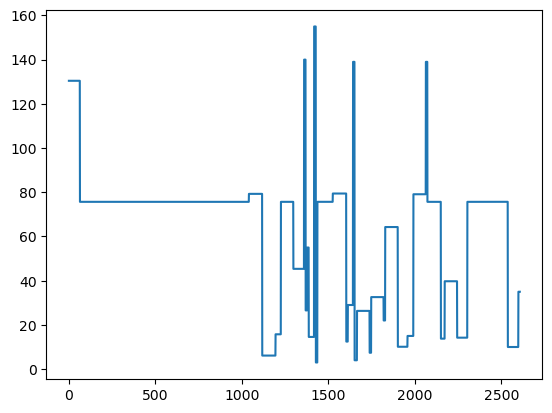

In [20]:
df_fb["RestingFitbitHeartrate_LE"].plot()

In [21]:
df_fb = df_fb[["Fitbit.Heart_LE", "RestingFitbitHeartrate_LE", "CorrelationFitbitHeartrateSteps_LE", "activity_trimmed"]]

df_fb.rename(columns={
    "Fitbit.Heart_LE": "hearth_rate",
    "RestingFitbitHeartrate_LE": "hearth_rate_resting",
    "CorrelationFitbitHeartrateSteps_LE": "hearth_corr_steps",
    "activity_trimmed": "level"
    }, inplace=True)

df_fb["level"] = df_fb["level"].apply(lambda x: replace_level_activity(x))

df_fb[["hearth_rate", "hearth_rate_resting"]] = df_fb[["hearth_rate", "hearth_rate_resting"]].astype(int)

In [22]:
df_fb.head(3)

,hearth_rate,hearth_rate_resting,hearth_corr_steps,level
0,132,130,1.0,1
1,132,130,1.0,1
2,129,130,1.0,1


In [23]:
df = pd.concat([df_main, df_aw, df_fb])

In [24]:
df.reset_index(inplace=True, drop=True)

In [25]:
print(df_main.shape[0] + df_aw.shape[0] + df_fb.shape[0])

12528


In [26]:
df

,hearth_rate,hearth_rate_resting,hearth_corr_steps,level
0,78,59,1.000000,1
1,78,59,1.000000,1
2,78,59,1.000000,1
3,78,59,1.000000,1
4,78,59,0.982816,1
...,...,...,...,...
12523,35,35,1.000000,6
12524,35,35,1.000000,6
12525,35,35,1.000000,6
12526,35,35,1.000000,6


<AxesSubplot: >

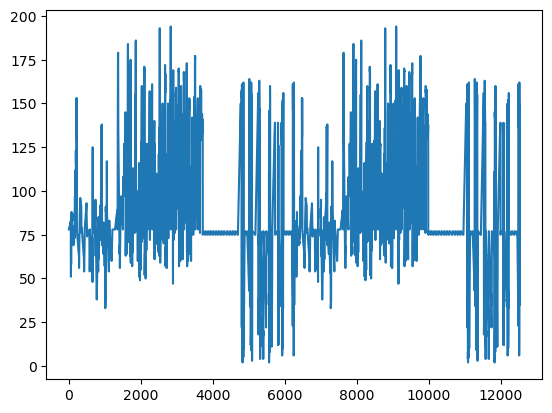

In [27]:
df["hearth_rate"].plot()

In [29]:
# df.to_pickle(os.path.join(DATA_DIR, "all_data.pickle"))